In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from preprocessUtils import *
from dataUtils import *
from augmentationUtils import *

# Import the data

In [2]:
## load training images and labels into numpy matrices and save into .npy files
#train_imgs, train_labels = merge_image_with_labels('training_patches/', 'binaryOutcomes.csv')
# np.save('train_imgs.npy', train_imgs)
# np.save('train_labels.npy', train_labels)


In [24]:
#load images and labels from .npy files
train_imgs = np.load('data/train_imgs.npy')
train_labels = np.load('data/train_labels.npy')

In [3]:
#check shapes of images and labels
print("Training image shape :", train_imgs.shape)
print("Training image labels:", train_labels.shape)

Training image shape : (100, 100, 3, 1727)
Training image labels: (1727,)


# Explore the Data

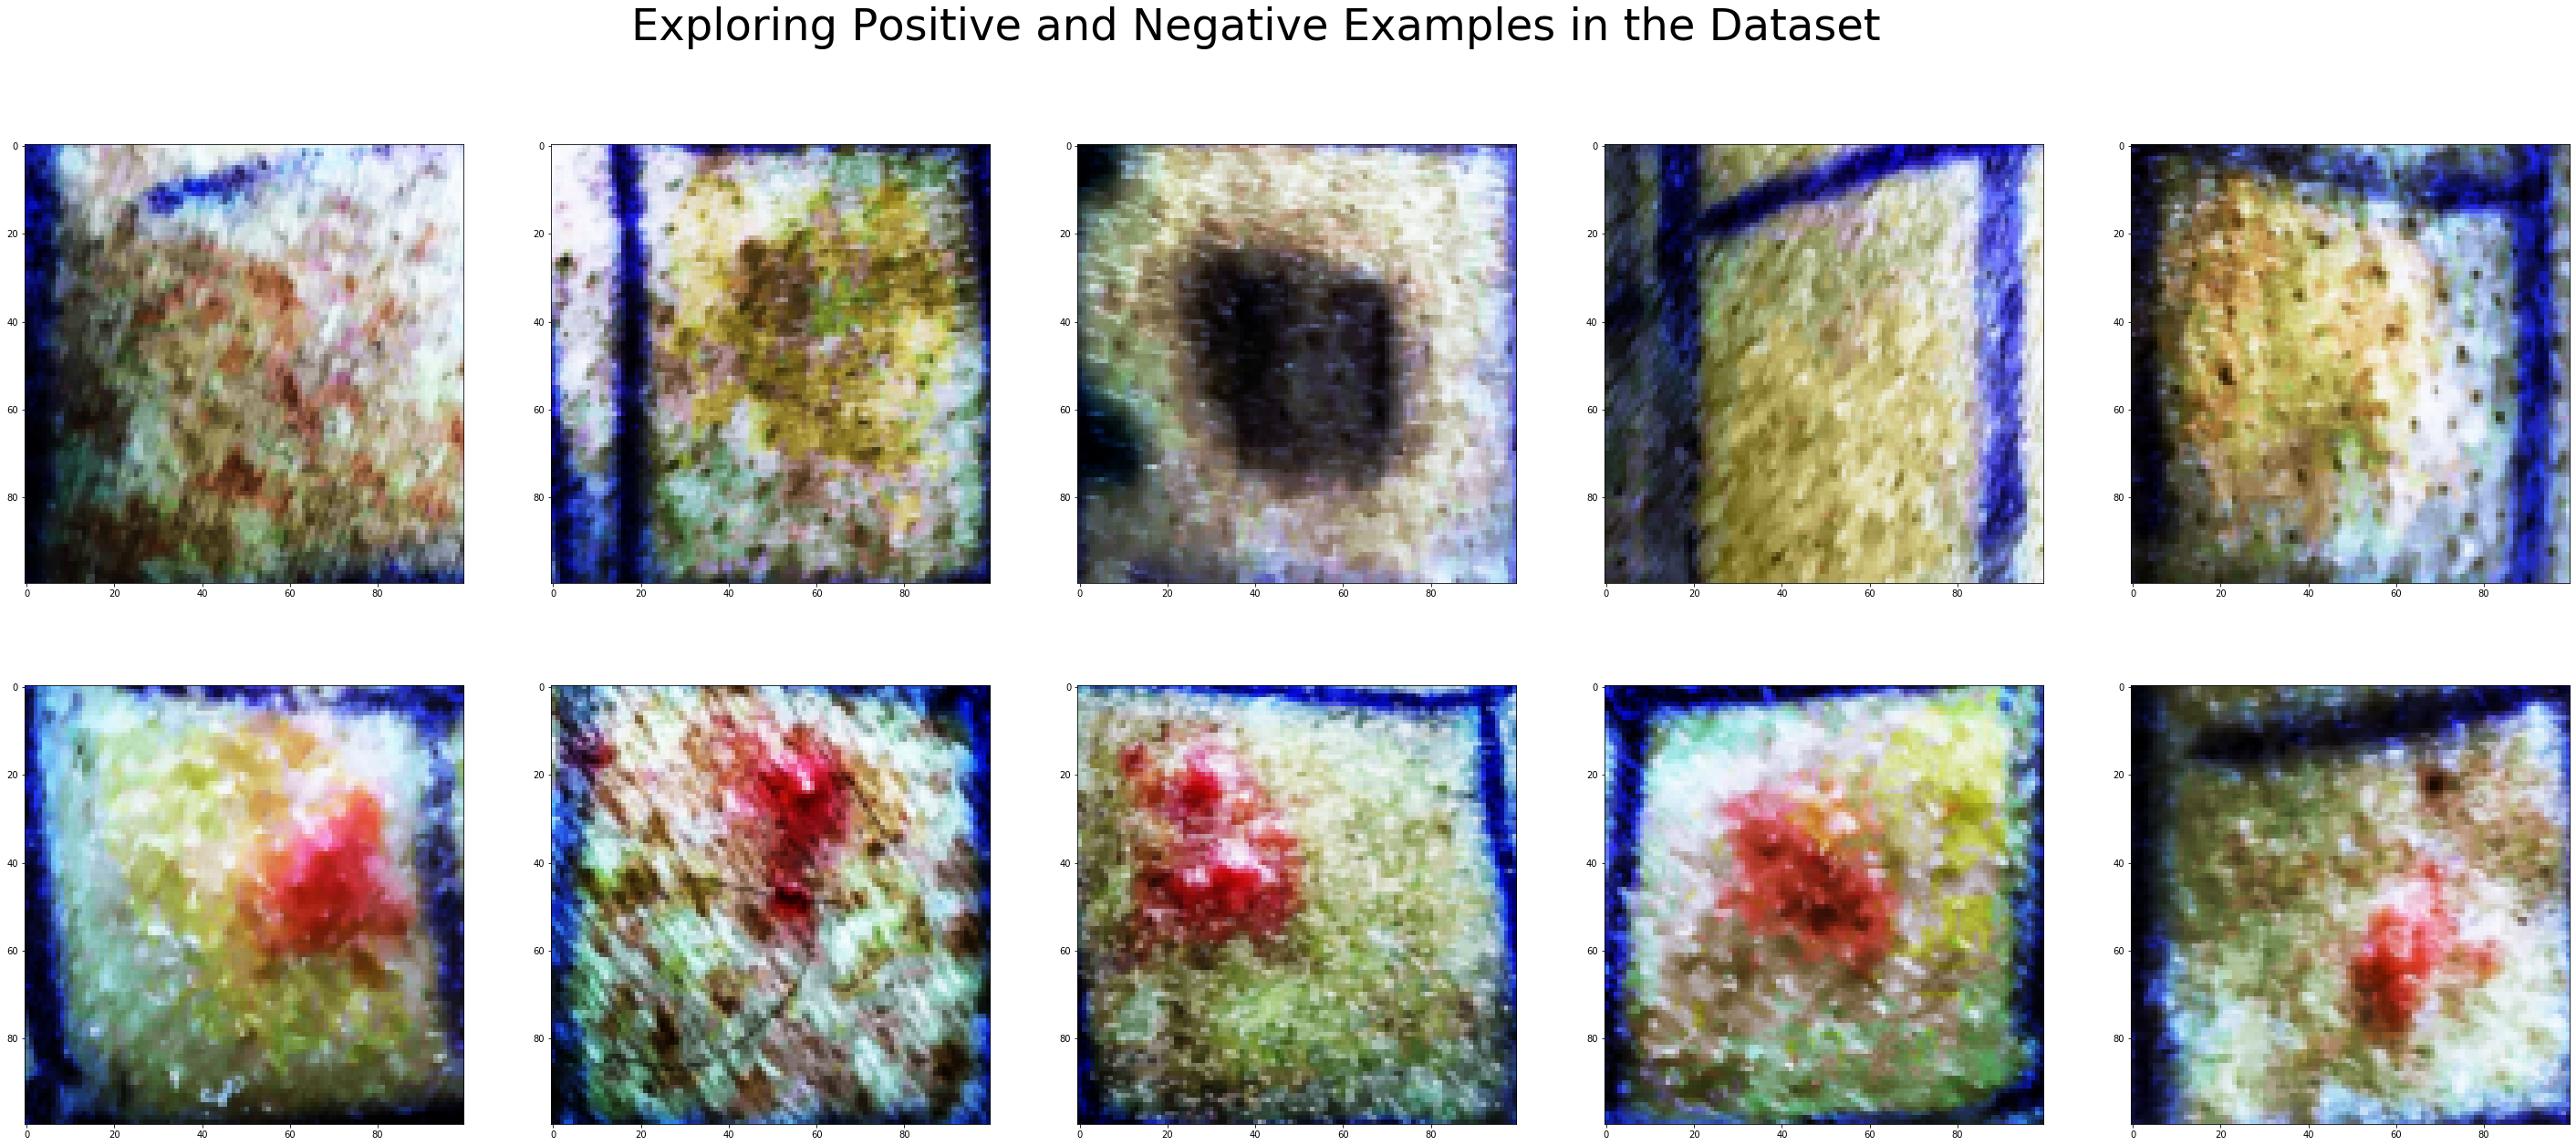

In [4]:
# Let's look at some positive and negative examples 

num_examples = 5
num_classes = 2

negative_indices = np.where(train_labels == 0)[0]
positive_indices = np.where(train_labels == 1)[0]

# randomly pick a subset from all of the examples 
negative_example_indices = np.random.choice(negative_indices, num_examples, replace=False)
positive_example_indices = np.random.choice(positive_indices, num_examples, replace=False)

plt.figure(figsize=(50, 20))
plt.suptitle('Exploring Positive and Negative Examples in the Dataset', fontsize=48)

# top row is negative examples 
for i, idx in enumerate(negative_example_indices): 
    plt.subplot(num_classes, num_examples, i+1)    
    plt.imshow(train_imgs[:,:,:,idx])

# bottom row is positive examples 
for i, idx in enumerate(positive_example_indices): 
    plt.subplot(num_classes, num_examples, i+num_examples+1)    
    plt.imshow(train_imgs[:,:,:,idx])
    

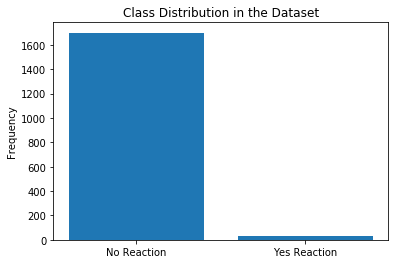

There are 1699 negative examples and 28 positive examples in the data set


In [5]:
# Let's look at the distribution of classes present in the data set 

num_positive = len(positive_indices)
num_negative = len(negative_indices)

classes = ['No Reaction', 'Yes Reaction']
y_pos = np.arange(len(classes))
performance = [num_negative, num_positive]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, classes)
plt.ylabel('Frequency')
plt.title('Class Distribution in the Dataset')

plt.show()

print('There are', int(num_negative), 'negative examples and', int(num_positive), 'positive examples in the data set' )

# Run Data Augmentations

In [6]:
# let's even out the dataset 
aug_imgs, aug_labels = augment_with_random_sampling(train_imgs, train_labels)
_

Shape of Augmented dataset (100, 100, 3, 336)
Shape of Augmented labels (336,)


''

# Start Training Models

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# one how encode the labels for training 
num_labels = aug_labels.shape[0]
one_hot_labels = np.zeros((num_labels,2))

for i in range(num_labels): 
    if aug_labels[i] == 0: 
        one_hot_labels[i,:] = [1, 0]
    else: 
        one_hot_labels[i,:] = [0, 1]

In [12]:
# Split into training, validation, and test sets 
# Note: We have to switch the order of the dimensions of the images so scikit can split it properly 

# Note: This will automatically shuffle the data before splitting it 
# Here we are splitting 70% for training and 20% for testing and 10% for validation 
# We have to use train_test_split twice in order to trick it into splitting off a validation set, too 
imgs_train, imgs_test, labels_train, labels_test = train_test_split(np.rollaxis(aug_imgs, 3), one_hot_labels, test_size=0.30) 
imgs_test, imgs_val, labels_test, labels_val = train_test_split(imgs_test, labels_test, test_size=0.33) 

In [13]:
# We can check that this worked by checking the size of everything 
print(imgs_train.shape, imgs_val.shape, imgs_test.shape)
print(labels_train.shape, labels_val.shape, labels_test.shape)

(235, 100, 100, 3) (34, 100, 100, 3) (67, 100, 100, 3)
(235, 2) (34, 2) (67, 2)


In [17]:
custom_model = create_custom_model

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.
Train on 235 samples, validate on 34 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
235/235 [==============================] - 11s 47ms/sample - loss: 0.2507 - acc: 0.5830 - val_loss: 0.2467 - val_acc: 0.6176
Epoch 2/25
235/235 [==============================] - 12s 49ms/sample - loss: 0.1620 - acc: 0.7532 - val_loss: 0.2126 - val_acc: 0.6765
Epoch 3/25
235/235 [==============================] - 12s 49ms/sample - loss: 0.1430 - acc: 0.8000 - val_loss: 0.1511 - val_acc: 0.8529
Epoch 4/25
235/235 [==============================] - 12s 50ms/sample - loss: 0.1142 - acc: 0.8596 - val_loss: 0.1507 - val_acc: 0.7647
Epoch 5/25
235/235 [==============================] - 12s 49ms/sample - loss: 0.1001 - acc: 0.8596 - val_loss: 0.1475 - val_acc: 0.8235
Epoch 6/25
235/235 [==============================] - 12s 49ms/sample - loss: 0.0827 - acc: 0.8894 - val_loss: 0.1388 - val_acc: 0.8824
Epoch 7/25
235/235 [=======================

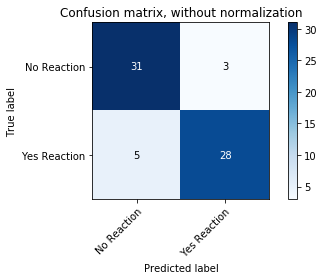

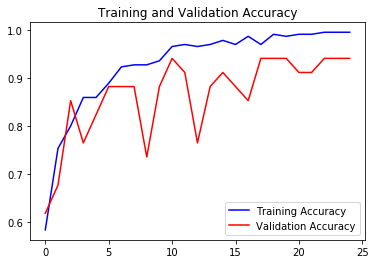

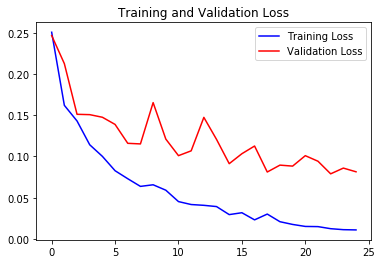

In [18]:
model = train_model(custom_model) 

# TESTING

In [31]:
#load test images
test_img_dir = 'data/testing_patches/'
img_files_df = load_data_from_folder_into_dataframe(img_dir)
num_imgs, _ = img_files_df.shape
test_imgs = np.zeros((100, 100, 3, num_imgs))

for i, img_file in enumerate(img_files_df['full_file_path'].values): 

    # display progress
    if i % 100 == 0:
        print(i, 'out of', num_imgs, 'images processed')

    # read in the image     
    img = np.asarray(Image.open(img_file))

    # run pre-processing 
    test_imgs[:,:,:,i] = preprocess(img)




0 out of 452 images processed
100 out of 452 images processed
200 out of 452 images processed
300 out of 452 images processed
400 out of 452 images processed


In [145]:
probs = custom_model.predict(f)

In [149]:
predicted_positive = np.where(probs[:,1]>0.95)

(array([  9, 178, 214, 242, 290, 331, 334]),)

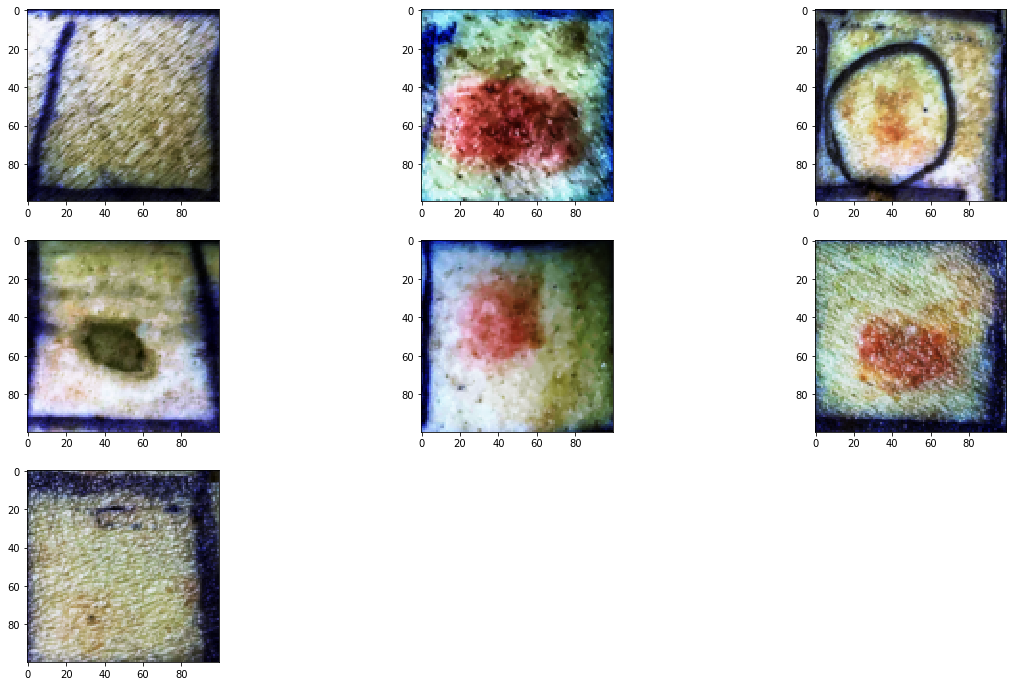

In [153]:
plt.figure(figsize = (20,12))
for i,idx in enumerate(predicted_positive[0]):
    plt.subplot(len(predicted_positive[0])/2,3, i+1)
    plt.imshow(f[idx])

# IGNORE

In [155]:
test_imgs, test_labels = merge_image_with_labels('data/testing_patches/', 'data/binaryOutcomesRemoved.csv')

In [156]:
test_imgs

array([], shape=(100, 100, 3, 0), dtype=float64)

In [157]:
pd.read_csv('data/binaryOutcomesRemoved.csv')

,Individual Patch,Binary Outcome,True Diagnosis,Unnamed: 3,Binary Outcome Key,Unnamed: 5
0,001-2002-1_1,0,0,NaN,Allergic,1.0
1,001-2002-1_2,0,0,NaN,Non - Allergic (Including irritant and ?),0.0
2,001-2002-1_3,0,0,NaN,NaN,NaN
3,001-2002-1_4,0,0,NaN,NaN,NaN
4,001-2002-1_5,0,0,NaN,NaN,NaN
5,001-2002-1_6,0,0,NaN,NaN,NaN
6,001-2002-1_7,0,0,NaN,NaN,NaN
7,001-2002-1_8,0,0,NaN,NaN,NaN
8,001-2002-1_9,0,0,NaN,NaN,NaN
9,001-2002-1_10,0,0,NaN,NaN,NaN


In [ ]:
m